<a href="https://colab.research.google.com/github/KU-BIG/KUBIG_2023_SPRING/blob/main/1.%20%EB%B0%A9%ED%95%99%EB%B6%84%EB%B0%98/DL/%EA%B3%BC%EC%A0%9C/1%EC%A3%BC%EC%B0%A8/1%E1%84%8C%E1%85%AE%E1%84%8E%E1%85%A1_%E1%84%80%E1%85%AA%E1%84%8C%E1%85%A6_%EA%B9%80%EC%97%B0%EA%B7%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1주차 과제
- 파이토치 시작하기 및 간단한 코드 빈칸 채워넣기

## 파이토치 시작하기

#### 파이토치 시작하기

In [1]:
import torch

#### tensor 개념 파악 (array of numerical values(vector, matrix..))
- tensor는 array 이나 matrix 와 매우 유사한 특수한 자료구조.
- PyTorch에서는 텐서를 사용하여 모델의 입출력과 모델의 매개변수를 부호화(encode).
- GPU 등 다른 연산 가속을 위한 특수 하드웨어에서 실행할 수 있다는 점을 제외하면, numpy의 ndarray와 매우 유사.


#### 텐서 초기화(생성)
- tensor: 입력한 데이터로부터 직접
- from_numpy: numpy 배열로부터
- ones_like/rand_like: 다른 텐서로부터
- rand/ones/zeros: 무작위 또는 상수 값 사용
 - 이 경우 텐서의 차원을 나타내는 tuple 필요.

#### 텐서 연산
- 인덱싱/슬라이싱, 전치
- cat: 결합 (vs torch.stack)
- mul: 요소별 곱
- matmul: 행렬 곱

4x3 행렬 두개 만들고 행으로 병합, 열로 병합

In [2]:
X=torch.rand(4, 3) # random value
Y=torch.rand(4, 3)
print(torch.cat([X, Y], dim=0)) # 행으로 병합
print(torch.cat([X, Y], dim=1)) # 열로 병합

tensor([[0.4045, 0.8075, 0.0187],
        [0.4361, 0.1387, 0.4442],
        [0.2878, 0.9043, 0.8395],
        [0.7883, 0.2298, 0.8231],
        [0.4722, 0.6723, 0.1075],
        [0.3334, 0.9406, 0.1357],
        [0.6121, 0.0999, 0.3703],
        [0.7724, 0.7869, 0.4856]])
tensor([[0.4045, 0.8075, 0.0187, 0.4722, 0.6723, 0.1075],
        [0.4361, 0.1387, 0.4442, 0.3334, 0.9406, 0.1357],
        [0.2878, 0.9043, 0.8395, 0.6121, 0.0999, 0.3703],
        [0.7883, 0.2298, 0.8231, 0.7724, 0.7869, 0.4856]])


#### linear regression implementation from scratch
- 머신러닝 기초와 비슷한 내용이지만 파이토치로 실행해보며 익숙해지는것이 목표


In [3]:
!python --version

Python 3.8.16


In [4]:
torch.__version__

'1.13.0+cu116'

In [5]:
!pip install d2l

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.6/112.6 KB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 32.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.7/15.7 MB 51.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 62.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.0/121.0 KB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 965.4/965.4 KB 33.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.6/83.6 KB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 60.9 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.6
    Uninstalling numpy-1.21.6:
      Successfully uninstalled numpy-1.21.6
  Attempting uninstall: pandas
    Found existing installation: pandas 1.3.5
    Uninstalling pandas-1.3.5

In [6]:
!pip show d2l

Name: d2l
Version: 0.17.6
Summary: Dive into Deep Learning
Home-page: https://d2l.ai
Author: D2L Developers
Author-email: d2l.devs@gmail.com
License: MIT-0
Location: /usr/local/lib/python3.8/dist-packages
Requires: jupyter, matplotlib, numpy, pandas, requests
Required-by: 


In [7]:
!pip install matplotlib-inline

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [8]:
%matplotlib inline
import random
import torch
from d2l import torch as d2l

In [9]:
def synthetic_data(w, b, num_examples): # Generating the dataset
    """Generate y = Xw + b + noise."""
    X = torch.normal(0, 1, (num_examples, len(w))) # torch.normal(mean, std, size=())
    y = torch.matmul(X, w) + b
    y += torch.normal(0, 0.01, y.shape) # add the noise term, adjusting to y shape
    return X, y.reshape((-1, 1)) # shape of y into (n, 1)

true_w = torch.tensor([3, -1.5])
true_b = 5.5
features, labels = synthetic_data(true_w, true_b, 2000) # applying randomly generating data

In [ ]:
print('features:', features[0],'\nlabel:', labels[0])

features: tensor([-0.1393,  1.4576]) 
label: tensor([2.8881])


In [ ]:
def data_iter(batch_size, features, labels): # for effective optimization -> divide sample(iter)
    num_examples = len(features)
    indices = list(range(num_examples))
    # The examples are read at random, in no particular order
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size): # 0 ~ num_ex, step: batch_size
        ##이하는 반복문에 대한 조건입니다.
        batch_indices = torch.tensor(
            indices[i: min(i + batch_size, num_examples)])
        yield features[batch_indices], labels[batch_indices]

In [ ]:
batch_size = 20

for X, y in data_iter(batch_size, features, labels):
    print(X, '\n', y)
    break

tensor([[ 0.3901, -1.0808],
        [-0.3154,  0.2469],
        [ 0.8731,  1.3704],
        [ 0.8309, -0.3673],
        [ 0.2372, -1.4932],
        [ 0.4321, -2.6721],
        [-0.6069, -1.6713],
        [ 0.7953, -0.4998],
        [ 0.2702, -0.5410],
        [-1.7666,  1.3316],
        [-0.3550,  0.9414],
        [-0.0887,  0.3778],
        [-2.0929,  1.1967],
        [ 0.0243,  0.5397],
        [ 0.8861,  0.7348],
        [ 0.6199, -0.5715],
        [ 0.7841,  0.1504],
        [ 0.9174, -0.6410],
        [ 0.7159, -0.2060],
        [ 0.7779, -0.7572]]) 
 tensor([[ 8.3040],
        [ 4.1713],
        [ 6.0583],
        [ 8.5498],
        [ 8.4408],
        [10.8046],
        [ 6.1820],
        [ 8.6308],
        [ 7.1245],
        [-1.8017],
        [ 3.0350],
        [ 4.6683],
        [-2.5760],
        [ 4.7802],
        [ 7.0354],
        [ 8.2231],
        [ 7.6367],
        [ 9.2032],
        [ 7.9567],
        [ 8.9778]])


In [ ]:
w = torch.normal(0, 0.01, size=(2,1), requires_grad=True)
b = torch.tensor([5.4]) # 원하는 실수 대입

In [ ]:
w

tensor([[ 0.0064],
        [-0.0057]], requires_grad=True)

In [ ]:
b

tensor([5.4000])

In [ ]:
def linreg(X, w, b):
    """The linear regression model."""
    return torch.matmul(X, w) + b ###lr func 코드, 행렬 곱

In [ ]:
def squared_loss(y_hat, y):  
    """Squared loss."""
    return (y_hat - y.reshape(y_hat.shape)) ** 2 / 2 ###loss function, y를 y_hat의 형태로 변환 후 계산

In [ ]:
def sgd(params, lr, batch_size):
    """Minibatch stochastic gradient descent."""
    with torch.no_grad():
        for param in params:
            param -= lr * param.grad / batch_size
            param.grad.zero_()

In [ ]:
lr = 0.01 # learning rate: 학습 속도
num_epochs = 20 # 직접 설정
net = linreg # 위에서 설정한 linear regression model
loss = squared_loss # 위에서 설정한 loss function

w0 = []
w1 = []
loss_w0 = []
loss_w1 = []

for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        l = loss(net(X, w, b), y) # net 으로 y_hat 계산 후 y_hat과 y로 loss 계산
        # Compute gradient on `l` with respect to [`w`, `b`]
        l.sum().backward()
        sgd([w], lr, batch_size) # gradient를 계산하기 위한 param은 w, b -> 오류??
    with torch.no_grad():
        train_l = loss(net(features, w, b), labels)
        print(f'epoch {epoch + 1}, loss {float(train_l.mean()):f}') # print loss for each epoch
        # For drawing plot
        w0.append(w.tolist()[0])
        w1.append(w.tolist()[1])
        loss_w0.append(train_l[0].mean())
        loss_w1.append(train_l[1].mean())

epoch 1, loss 0.771444
epoch 2, loss 0.112228
epoch 3, loss 0.020003
epoch 4, loss 0.007157
epoch 5, loss 0.005322
epoch 6, loss 0.005068
epoch 7, loss 0.005027
epoch 8, loss 0.005023
epoch 9, loss 0.005022
epoch 10, loss 0.005022
epoch 11, loss 0.005022
epoch 12, loss 0.005022
epoch 13, loss 0.005022
epoch 14, loss 0.005022
epoch 15, loss 0.005022
epoch 16, loss 0.005022
epoch 17, loss 0.005022
epoch 18, loss 0.005022
epoch 19, loss 0.005022
epoch 20, loss 0.005022


In [ ]:
w0

[[1.877158284187317],
 [2.579221725463867],
 [2.8430376052856445],
 [2.9414727687835693],
 [2.9789419174194336],
 [2.9926695823669434],
 [2.9987223148345947],
 [3.000450849533081],
 [3.0013492107391357],
 [3.001110553741455],
 [3.002087354660034],
 [3.0018677711486816],
 [3.0022993087768555],
 [3.002192497253418],
 [3.00162672996521],
 [3.002094030380249],
 [3.001281261444092],
 [3.001599073410034],
 [3.0014724731445312],
 [3.0011584758758545]]

In [ ]:
w1

[[-0.9547941088676453],
 [-1.3022379875183105],
 [-1.429902195930481],
 [-1.4765475988388062],
 [-1.4939452409744263],
 [-1.5000382661819458],
 [-1.5025697946548462],
 [-1.5029102563858032],
 [-1.5031858682632446],
 [-1.5037118196487427],
 [-1.5034863948822021],
 [-1.503455400466919],
 [-1.5036602020263672],
 [-1.5031013488769531],
 [-1.5036379098892212],
 [-1.50351083278656],
 [-1.5038717985153198],
 [-1.5032013654708862],
 [-1.5033074617385864],
 [-1.502739667892456]]

In [ ]:
print(f'error in estimating w: {true_w - w.reshape(true_w.shape)}')
print(f'error in estimating b: {true_b - b}')

error in estimating w: tensor([-0.0012,  0.0027], grad_fn=<SubBackward0>)
error in estimating b: tensor([0.1000])


+cost graph 그리기 (x축 w, y축 loss)

In [ ]:
!pip install matplotlib==3.1.3 # version down

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 66.8 MB/s eta 0:00:00
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.5.1
    Uninstalling matplotlib-3.5.1:
      Successfully uninstalled matplotlib-3.5.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
d2l 0.17.6 requires matplotlib==3.5.1, but you have matplotlib 3.1.3 which is incompatible.


Text(0, 0.5, 'loss')

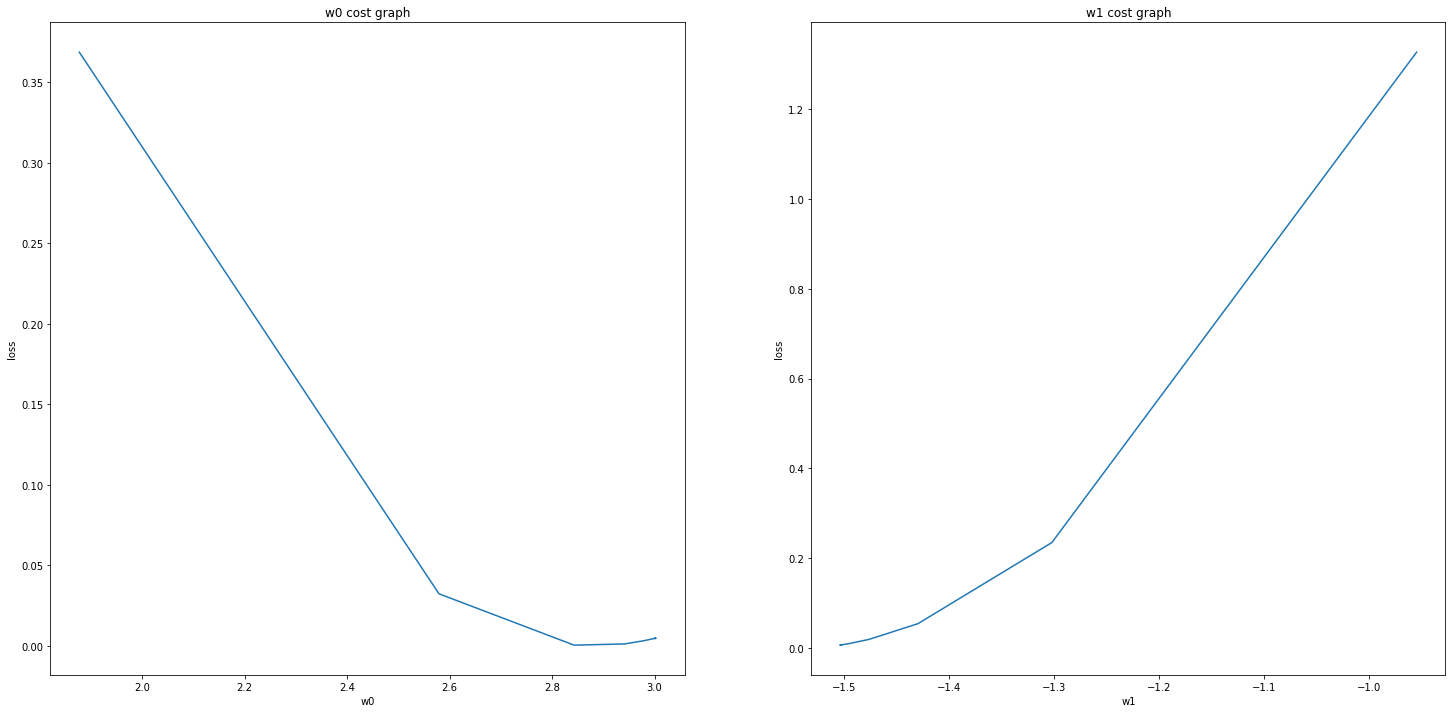

In [ ]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(25, 12))

ax1.plot(w0, loss_w0)
ax1.set_title('w0 cost graph')
ax1.set_xlabel('w0')
ax1.set_ylabel('loss')

ax2.plot(w1, loss_w1)
ax2.set_title('w1 cost graph')
ax2.set_xlabel('w1')
ax2.set_ylabel('loss')

concise implementation of linear regression 
- api 사용해보기

In [ ]:
import numpy as np
import torch
from torch.utils import data
from d2l import torch as d2l


true_w = torch.tensor([3, -1.5])
true_b = 5.5
features, labels = d2l.synthetic_data(true_w, true_b, 2000)

In [ ]:
def load_array(data_arrays, batch_size, is_train=True): 
    """Construct a PyTorch data iterator."""
    dataset = data.TensorDataset(*data_arrays)
    return data.DataLoader(dataset, batch_size, shuffle=is_train)

batch_size = 20
data_iter = load_array((features, labels), batch_size)

In [ ]:
next(iter(data_iter))

[tensor([[ 1.0194,  2.2593],
         [-1.5215,  0.0259],
         [ 0.2956, -1.5578],
         [-0.8121, -0.7512],
         [ 2.1225,  0.9717],
         [ 1.3154, -2.1368],
         [-0.9219, -0.9047],
         [-1.0903, -0.1391],
         [-0.2009,  1.2211],
         [-3.1747,  2.1063],
         [ 1.8658,  0.7814],
         [-1.7873, -1.1760],
         [ 1.6733, -1.0368],
         [ 0.9476,  0.6655],
         [ 0.7456, -0.3378],
         [-0.5798,  0.0797],
         [-0.8653,  0.2190],
         [-0.2372,  0.5495],
         [ 0.1578, -0.3859],
         [-0.1708, -0.1901]]), tensor([[ 5.1727],
         [ 0.9128],
         [ 8.7386],
         [ 4.1917],
         [10.4029],
         [12.6468],
         [ 4.0993],
         [ 2.4368],
         [ 3.0560],
         [-7.1800],
         [ 9.9173],
         [ 1.8995],
         [12.0658],
         [ 7.3447],
         [ 8.2359],
         [ 3.6435],
         [ 2.5848],
         [ 3.9586],
         [ 6.5601],
         [ 5.2707]])]

In [ ]:
from torch import nn

net = nn.Sequential(nn.Linear(2, 1)) # nn.Linear: 선형회귀 구현, 2개 입력하여 1개 출력(loss)
# nn.Sequential: nn.Linear, nn.ReLU 모듈을 param로 받아 묶어 연산

In [ ]:
nn.Linear(2, 1)

Linear(in_features=2, out_features=1, bias=True)

In [ ]:
net[0].weight.data.normal_(0, 0.01)
net[0].bias.data.fill_(0)

tensor([0.])

In [ ]:
loss = nn.MSELoss() # api function으로 설정

In [ ]:
trainer = torch.optim.SGD(net.parameters(), lr=0.01) # sgd 함수 활용

In [ ]:
net.parameters()

<generator object Module.parameters at 0x7f454de13270>

In [ ]:
num_epochs = 3
for epoch in range(num_epochs):
    for X, y in data_iter:
        l = loss(net(X), y) # y_hat & y
        trainer.zero_grad()
        l.backward()
        trainer.step()
    l = loss(net(features), labels)
    print(f'epoch {epoch + 1}, loss {l:f}')

epoch 1, loss 0.697423
epoch 2, loss 0.012054
epoch 3, loss 0.000310


In [ ]:
net[0] # Seq의 요소 추출

Linear(in_features=2, out_features=1, bias=True)

In [ ]:
w = net[0].weight.data # 학습 결과 w
print('error in estimating w:', true_w - w.reshape(true_w.shape))
b = net[0].bias.data # 학습 결과 b
print('error in estimating b:', true_b - b)

error in estimating w: tensor([ 0.0039, -0.0069])
error in estimating b: tensor([0.0122])
